In [ ]:
#    squareMeters                  квадратных метров
#     numberOfRooms                 количество комнат
#       hasYard                  имеется ли двор
#       hasPool                    имеется ли бассейн
#   floors - number of floors     этажи - количество этажей
#       cityCode              -  почтовый индекс
#    cityPartRange            — чем выше диапазон, тем престижнее район
#     numPrevOwners           - количество предыдущих владельцев
#        made                  сделано  - год
#      isNewBuilt                новый ли
#     hasStormProtector          защищен ли от шторма
#        basement	            подвал - площадь подвала (квадратные метры)
#          attic	              чердак - площадь чердака
#          garage               гараж - размер гаража
#       hasStorageRoom           наличие кладовой
#         hasGuestRoom           - количество гостевых комнат
#          price                  цена - прогнозируемое значение

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
paris_housing_price = pd.read_csv("C:/Users/Pavel/Lessen_jypyter/ParisHousing.csv")

In [11]:
paris_housing_price.isna().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [34]:
paris_housing_price

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [10]:
paris_housing_price.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [12]:
paris_housing_price.dtypes

squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
dtype: object

In [13]:
php = paris_housing_price

In [14]:
corr = php.corr()

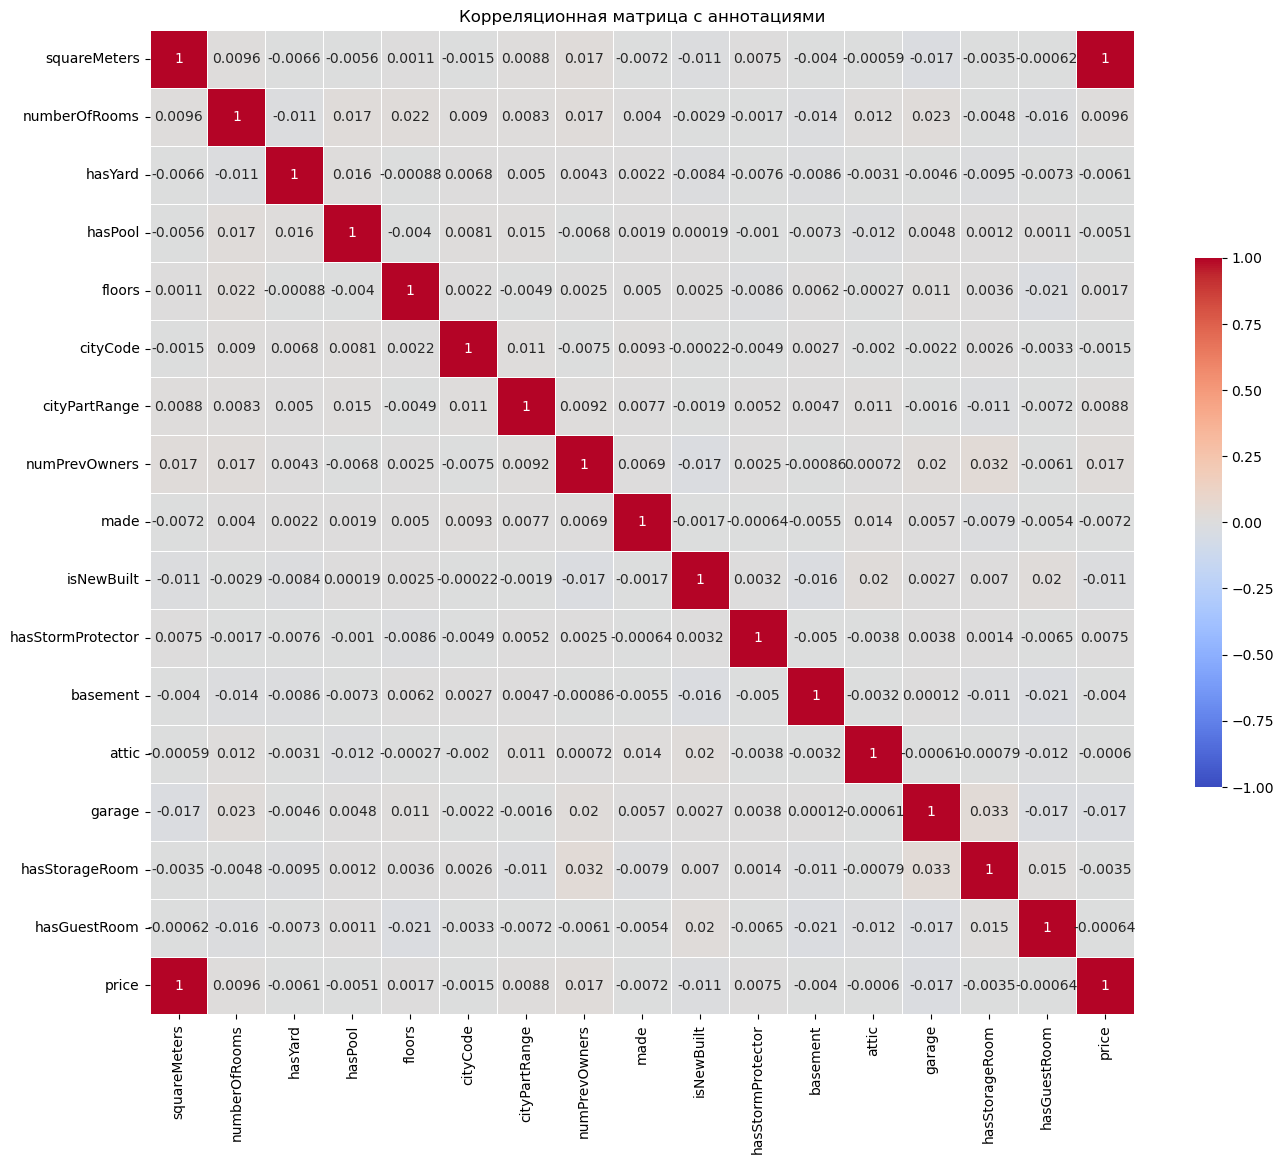

In [28]:
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.title('Корреляционная матрица с аннотациями')
plt.tight_layout()
plt.show()

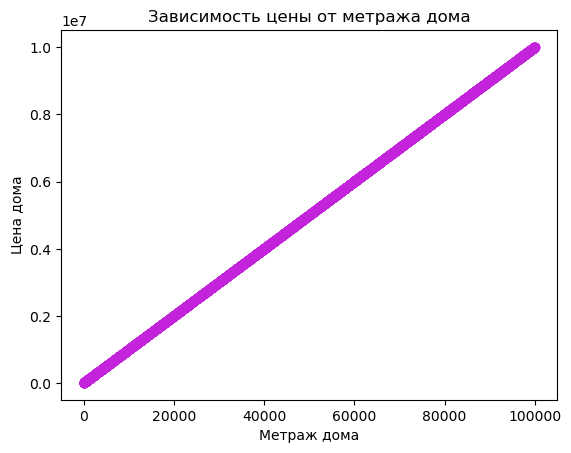

In [51]:
sns.regplot(php, y="price", x= "squareMeters", robust=True, color = '#c323db')
plt.title('Зависимость цены от метража дома')
plt.xlabel('Метраж дома')
plt.ylabel('Цена дома')
plt.show()

In [56]:
X = php.drop(columns = ['price'])
X

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4


In [58]:
y = php['price']
y

0       7559081.5
1       8085989.5
2       5574642.1
3       3232561.2
4       7055052.0
          ...    
9995     176425.9
9996    4448474.0
9997    8390030.5
9998    5905107.0
9999     146708.4
Name: price, Length: 10000, dtype: float64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= 0.1)

In [60]:
X_train.shape

(9000, 16)

In [61]:
X_test.shape

(1000, 16)

In [62]:
y_train.shape

(9000,)

In [63]:
y_test.shape

(1000,)

In [90]:
reg = LinearRegression().fit(X_train, y_train)
reg

LinearRegression()

In [87]:
reg.score(X_train,y_train)

0.9999995636830149

In [ ]:
reg.score(X_train, x_test)

In [74]:
reg.coef_

array([ 1.00000024e+02,  2.51844810e-01,  3.01229551e+03,  2.97713775e+03,
        5.45420542e+01, -8.03888243e-04,  4.73685001e+01, -3.95730186e-01,
       -2.31311931e+00,  1.58041540e+02,  1.41196130e+02, -2.10562533e-03,
       -4.50939065e-03,  1.13432814e-01,  1.94856126e+01, -5.62033751e+00])

In [76]:
reg.intercept_

np.float64(4926.7585929222405)

In [92]:
y_pred = model.predict(X_test)


In [ ]:
mse = mean_square